climate data: https://amrdcdata.ssec.wisc.edu/dataset/antaws-dataset

locations: https://essd.copernicus.org/preprints/essd-2022-241/essd-2022-241-supplement.pdf

paper: https://essd.copernicus.org/preprints/essd-2022-241/essd-2022-241.pdf

other useful papers:
 1. https://journals.ametsoc.org/view/journals/clim/29/14/jcli-d-15-0642.1.xml
 2. file:///home/carter10/Downloads/thesis_ckittel%20(1).pdf

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import tabula

import os
import matplotlib.pyplot as plt
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"
from mpl_toolkits.basemap import Basemap
from src.plotting_functions import plot_observations_df

2022-10-25 11:49:12.832109: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


In [2]:
source = requests.get('https://amrdcdata.ssec.wisc.edu/dataset/antaws-dataset')
soup = BeautifulSoup(source.content)
div = soup.find_all('div', {'class':'dropdown btn-group'})

station_names = []
hrefs = []

for a in soup.find_all('a', href=True):
    if all(x in a['href'] for x in ['csv','day']):
        if any(href == a['href'] for href in hrefs):
            continue
        station_name = a['href'].split('/')[-1].split('_day.csv')[0]
        station_names.append(station_name)
        hrefs.append(a['href'])           

In [3]:
dfs = []
for station_name,href in zip(station_names,hrefs):
    df = pd.read_csv(f'{href}',encoding_errors='ignore')
    df['Station']=station_name
    dfs.append(df)
df_all = pd.concat(dfs)
df_all = df_all.reset_index(drop=True)

In [4]:
locations_dfs = tabula.read_pdf("/data/notebooks/jupyterlab-biascorrlab/data/Observations/essd-2022-241-supplement.pdf", pages='6-10')
columns = locations_dfs[0].columns
for df in locations_dfs[1:]:
    df.loc[-1] = df.columns
    df.sort_index(inplace=True) 
    df.columns = columns
    
locations_df = pd.concat(locations_dfs)
locations_df.reset_index(drop=True)

Got stderr: Oct 25, 2022 11:52:09 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Oct 25, 2022 11:52:10 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Oct 25, 2022 11:52:10 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Oct 25, 2022 11:52:10 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Oct 25, 2022 11:52:11 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Oct 25, 2022 11:52:11 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Oct 25, 2022 11:52:11 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Oct 25, 2022 11:52:11 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



,No.,Station,Lat(°C),Lon(°C),Elevation(m),Institution
0,1,AGO-4,-82.01,96.76,3597,AMRC
1,2,AGO-5,-77.24,123.52,3519,AMRC
2,3,AGO Site,-77.52,-23.74,1545,AMRC
3,4,AGO-A81,-81.5,3.74,2410,AMRC
4,5,AGO-A84,-84.36,-23.86,2103,AMRC
...,...,...,...,...,...,...
211,212,Panda300,-72.0,77.95,2344,CHINARE
212,213,Panda400,-72.86,77.38,2572,CHINARE
213,214,Panda1100,-79.01,76.99,3736,CHINARE
214,215,Taishan,-73.86,76.98,2626,CHINARE


In [5]:
locations_df['Station_Lower'] = [x.lower() for x in locations_df['Station']]
locations_df['Station_Lower'] = locations_df['Station_Lower'].str.replace(' ','-')
locations_df['Station_Lower'] = locations_df['Station_Lower'].str.replace('(','')
locations_df['Station_Lower'] = locations_df['Station_Lower'].str.replace(')','')
locations_df['Station_Lower'] = locations_df['Station_Lower'].str.replace('!','')

locations_df['Station_Lower'] = locations_df['Station_Lower'].str.replace('marilyn-byrd-glacier','marilyn')
locations_df['Station_Lower'] = locations_df['Station_Lower'].replace('mt.erebus','mt.-erebus')
locations_df['Station_Lower'] = locations_df['Station_Lower'].replace('mt.fleming','mt.-fleming')
locations_df['Station_Lower'] = locations_df['Station_Lower'].replace('panda-south','panda_south')

/tmp/ipykernel_12612/3283381617.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  locations_df['Station_Lower'] = locations_df['Station_Lower'].str.replace('(','')
/tmp/ipykernel_12612/3283381617.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  locations_df['Station_Lower'] = locations_df['Station_Lower'].str.replace(')','')


In [6]:
#checking certain stations - note missing aws4-17 stations
string = 'aws'
print(locations_df[locations_df['Station_Lower'].str.contains(string)])
df_all_mean = df_all.groupby('Station').mean()
print(df_all_mean[df_all_mean.index.str.contains(string)])

    No. Station Lat(°C) Lon(°C) Elevation(m) Institution Station_Lower
8   149   aws04  -72.75  -15.48           35        IMAU         aws04
9   150   aws05   -73.1  -13.17          360        IMAU         aws05
10  151   aws06  -74.47  -11.52         1160        IMAU         aws06
11  152   aws08   -76.0   -8.05         2400        IMAU         aws08
12  153   aws09   -75.0     0.0         2900        IMAU         aws09
13  154   aws10  -79.57  -45.78          890        IMAU         aws10
14  155   aws11  -71.17    -6.8          690        IMAU         aws11
15  156   aws12  -78.65   35.63         3620        IMAU         aws12
16  157   aws13  -82.12   55.03         3730        IMAU         aws13
17  158   aws14  -67.02   -61.5           50        IMAU         aws14
18  159   aws15  -67.57  -62.12           50        IMAU         aws15
19  160   aws16  -71.95   23.33         1300        IMAU         aws16
20  161   aws17  -65.93  -61.85           50        IMAU         aws17
11  19

In [7]:
# df_all_combined = df_all.join(locations_df.set_index('Station_Lower'), on='Station',lsuffix='_left', rsuffix='_right')
df_all_combined = locations_df.merge(df_all, how='outer', left_on='Station_Lower', right_on='Station')

In [8]:
df_all_combined

,No.,Station_x,Lat(°C),Lon(°C),Elevation(m),Institution,Station_Lower,Year,Month,Day,...,wt_T,Pressure(hPa),wt_P,Wind Speed(m/s),wt_WS,Wind Direction,wt_WD,Relative Humidity(%),wt_RH,Station_y
0,1,AGO-4,-82.01,96.76,3597,AMRC,ago-4,2013.0,1.0,1.0,...,0.875,629.1000,1.000,3.925000,1.000,246.875,1.000,58.7750,1.000,ago-4
1,1,AGO-4,-82.01,96.76,3597,AMRC,ago-4,2013.0,1.0,2.0,...,1.000,631.2125,1.000,2.562500,1.000,220.250,1.000,59.6750,1.000,ago-4
2,1,AGO-4,-82.01,96.76,3597,AMRC,ago-4,2013.0,1.0,3.0,...,0.875,630.6625,1.000,1.987500,1.000,262.875,1.000,56.6375,1.000,ago-4
3,1,AGO-4,-82.01,96.76,3597,AMRC,ago-4,2013.0,1.0,4.0,...,0.875,630.3500,1.000,4.112500,1.000,249.625,1.000,59.6250,1.000,ago-4
4,1,AGO-4,-82.01,96.76,3597,AMRC,ago-4,2013.0,1.0,5.0,...,1.000,626.7875,1.000,4.175000,1.000,264.125,1.000,59.7250,1.000,ago-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933895,216,Zhongshan,-69.37,76.38,18,CHINARE,zhongshan,2020.0,12.0,27.0,...,1.000,970.6750,1.000,5.257143,0.875,79.375,1.000,73.2500,1.000,zhongshan
933896,216,Zhongshan,-69.37,76.38,18,CHINARE,zhongshan,2020.0,12.0,28.0,...,1.000,973.1500,1.000,4.220000,0.625,103.250,1.000,64.5000,1.000,zhongshan
933897,216,Zhongshan,-69.37,76.38,18,CHINARE,zhongshan,2020.0,12.0,29.0,...,0.750,969.1625,1.000,4.200000,0.625,118.375,1.000,52.5000,1.000,zhongshan
933898,216,Zhongshan,-69.37,76.38,18,CHINARE,zhongshan,2020.0,12.0,30.0,...,1.000,974.4125,1.000,3.300000,0.875,129.875,1.000,54.5000,1.000,zhongshan


In [9]:
#null matches
print(df_all_combined[df_all_combined['Station_y'].isnull()==True][['Station_x']].drop_duplicates())
print(df_all_combined[df_all_combined['Station_x'].isnull()==True][['Station_y']].drop_duplicates())

       Station_x
799000     aws04
799001     aws05
799002     aws06
799003     aws08
799004     aws09
799005     aws10
799006     aws11
799007     aws12
799008     aws13
799009     aws14
799010     aws15
799011     aws16
799012     aws17
Empty DataFrame
Columns: [Station_y]
Index: []


In [10]:
df_all_combined_filtered = df_all_combined[df_all_combined['Temperature()'].isnull()==False] 
group = df_all_combined_filtered.groupby('Station_x')
df_all_combined_filtered = group.filter(lambda x: len(x) > 10000) # only stations with more than 10,000 days of measurements
df_all_combined_filtered = df_all_combined_filtered[df_all_combined_filtered['Month']==6] 

In [11]:
df_all_combined_filtered.groupby('Station_x').describe()['Temperature()']

,count,mean,std,min,25%,50%,75%,max
Station_x,,,,,,,,
Alessandra,871.0,-21.699371,5.361816,-34.637500,-25.587500,-22.200000,-18.335417,-2.475000
Arelis,930.0,-21.713573,5.426727,-34.283333,-25.622321,-21.843750,-17.838839,-6.775000
Byrd,903.0,-32.462303,9.250340,-57.675000,-39.406250,-31.916667,-25.423750,-11.475000
Eneide,911.0,-20.257978,5.329360,-32.912500,-24.327083,-20.650000,-16.675000,-2.425000
Ferrell,1089.0,-30.765163,7.738083,-51.250000,-36.875000,-31.016667,-24.820000,-10.650000
Gill,1016.0,-37.451528,9.208831,-59.371429,-44.512500,-38.040179,-30.738393,-10.416667
Lettau,891.0,-35.587783,9.568425,-59.250000,-43.362500,-36.516667,-28.346429,-12.425000
Lola,884.0,-27.012512,5.148935,-45.660000,-30.381875,-26.858333,-23.562500,-8.625000
Manuela,985.0,-25.474259,4.985687,-38.137500,-28.987500,-25.862500,-22.200000,-9.612500


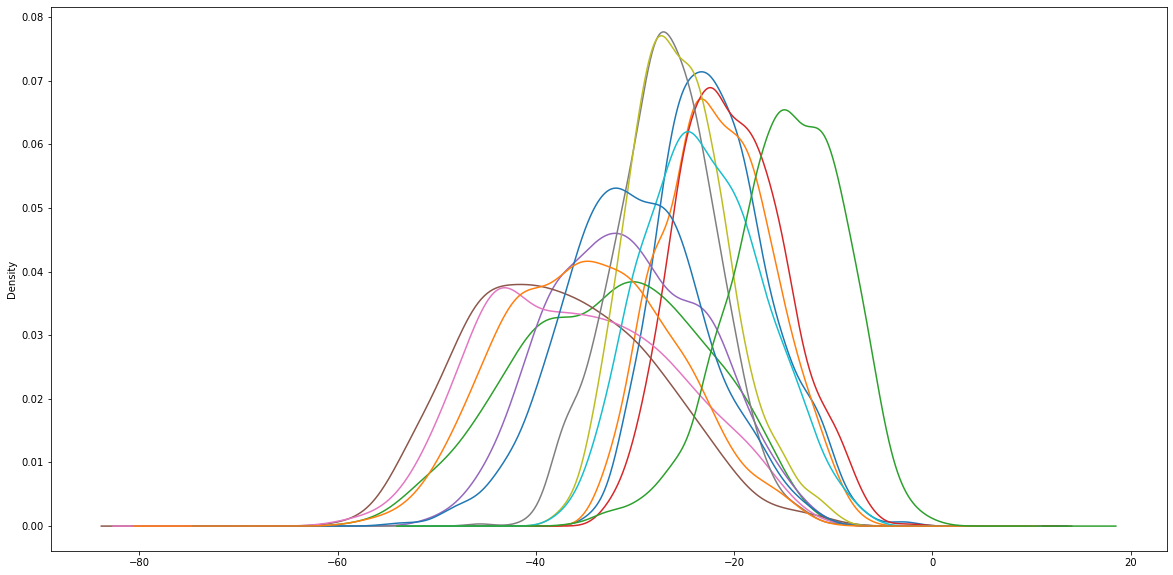

In [12]:
plt.figure(figsize=(20,10))
df_all_combined_filtered.groupby('Station_x')['Temperature()'].plot.kde()
plt.show()

In [13]:
df_larsen = df_all_combined[df_all_combined['Station_Lower'].str.contains('larsen-ice-shelf')]
df_larsen = df_larsen[df_larsen['Month']==2] 

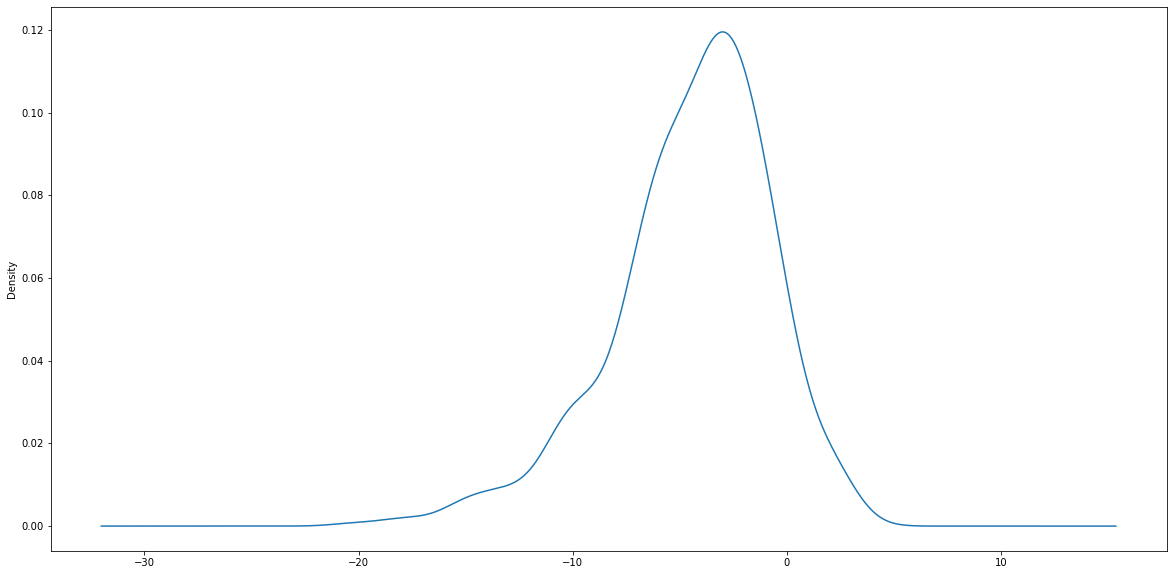

In [14]:
plt.figure(figsize=(20,10))
df_larsen.groupby('Station_x')['Temperature()'].plot.kde()
plt.show()

In [15]:
df_all_combined_mean = df_all_combined.groupby(['Station_x','Lat(°C)','Lon(°C)','Elevation(m)'],as_index=False).mean()
df_all_combined_mean = df_all_combined_mean.rename(columns={'Lat(°C)': 'latitude', 'Lon(°C)': 'longitude'})

In [16]:
df_all_combined_mean

,Station_x,latitude,longitude,Elevation(m),Year,Month,Day,Temperature(),wt_T,Pressure(hPa),wt_P,Wind Speed(m/s),wt_WS,Wind Direction,wt_WD,Relative Humidity(%),wt_RH
0,A028,-68.41,112.22,1622,1985.148387,7.158065,15.774194,-27.336510,0.554032,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
1,A028-A,-68.41,112.22,1622,1987.787452,6.346351,15.775928,-25.941814,0.505202,797.808302,0.583627,11.757880,0.517526,146.845586,0.578425,NaN,0.000000
2,A028-B,-68.41,112.22,1622,2001.721025,6.420496,15.746645,-26.246529,0.650620,800.617755,0.688796,9.979199,0.500407,NaN,0.000000,68.768258,0.598363
3,AGO Site,-77.52,-23.74,1545,1991.500684,6.519836,15.738714,-25.891957,0.756840,807.739058,0.959644,6.579010,0.379275,113.144858,0.405096,NaN,0.000000
4,AGO-4,-82.01,96.76,3597,2016.635458,6.387782,15.723772,-52.188779,0.905212,617.713279,0.994148,5.315469,0.972610,264.826931,0.974394,51.997900,0.792580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,aws13,-82.12,55.03,3730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,aws14,-67.02,-61.5,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,aws15,-67.57,-62.12,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,aws16,-71.95,23.33,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


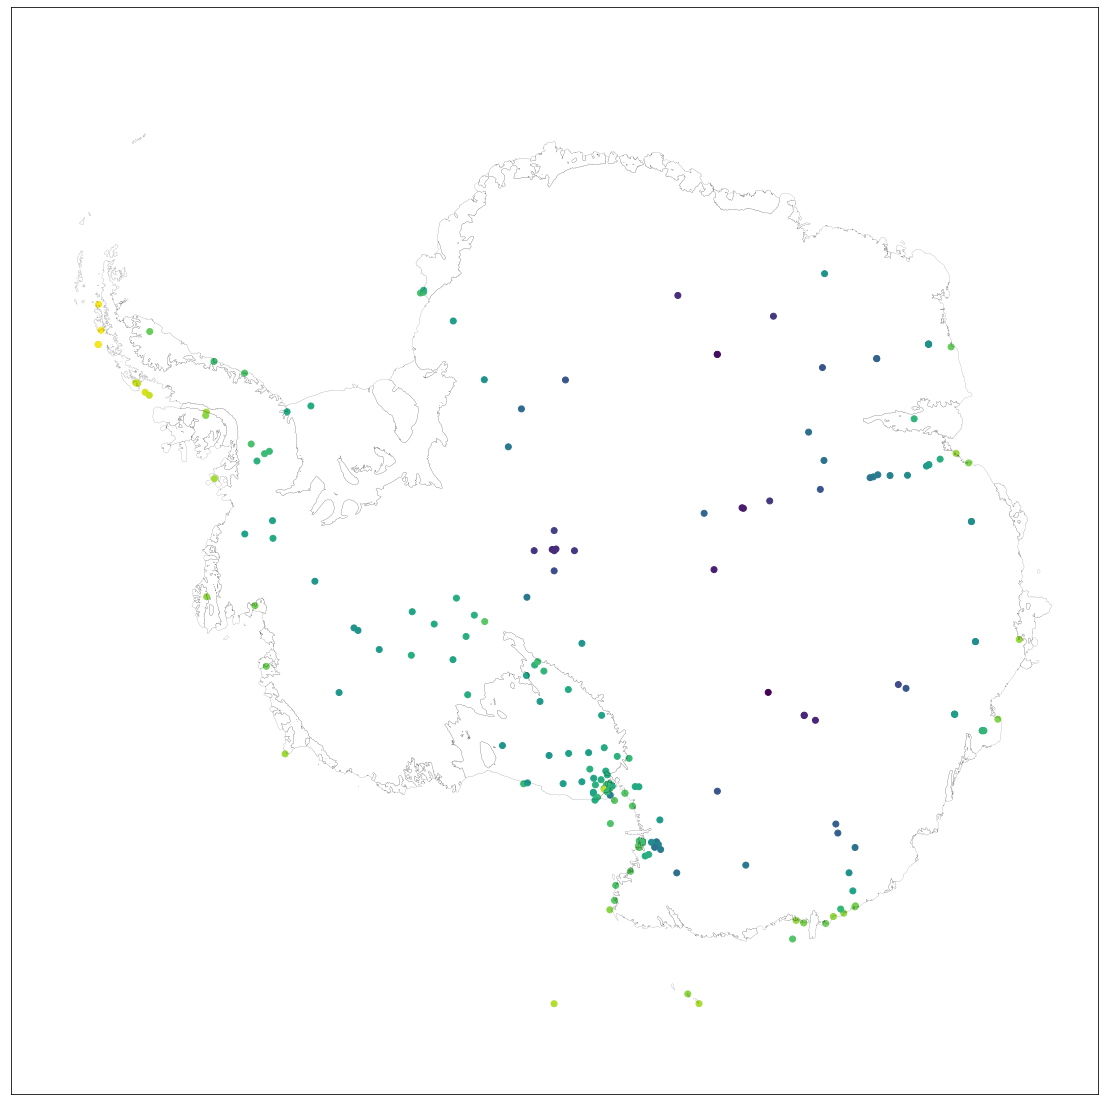

In [17]:
plt.figure(figsize=(20,20))
antarctica_map = Basemap(width=6000000,height=6000000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='l')
plot_observations_df(df_all_combined_mean,antarctica_map,'Temperature()','test')

In [30]:
df_all_combined

,No.,Station_x,Lat(°C),Lon(°C),Elevation(m),Institution,Station_Lower,Year,Month,Day,...,wt_T,Pressure(hPa),wt_P,Wind Speed(m/s),wt_WS,Wind Direction,wt_WD,Relative Humidity(%),wt_RH,Station_y
0,1,AGO-4,-82.01,96.76,3597,AMRC,ago-4,2013.0,1.0,1.0,...,0.875,629.1000,1.000,3.925000,1.000,246.875,1.000,58.7750,1.000,ago-4
1,1,AGO-4,-82.01,96.76,3597,AMRC,ago-4,2013.0,1.0,2.0,...,1.000,631.2125,1.000,2.562500,1.000,220.250,1.000,59.6750,1.000,ago-4
2,1,AGO-4,-82.01,96.76,3597,AMRC,ago-4,2013.0,1.0,3.0,...,0.875,630.6625,1.000,1.987500,1.000,262.875,1.000,56.6375,1.000,ago-4
3,1,AGO-4,-82.01,96.76,3597,AMRC,ago-4,2013.0,1.0,4.0,...,0.875,630.3500,1.000,4.112500,1.000,249.625,1.000,59.6250,1.000,ago-4
4,1,AGO-4,-82.01,96.76,3597,AMRC,ago-4,2013.0,1.0,5.0,...,1.000,626.7875,1.000,4.175000,1.000,264.125,1.000,59.7250,1.000,ago-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933895,216,Zhongshan,-69.37,76.38,18,CHINARE,zhongshan,2020.0,12.0,27.0,...,1.000,970.6750,1.000,5.257143,0.875,79.375,1.000,73.2500,1.000,zhongshan
933896,216,Zhongshan,-69.37,76.38,18,CHINARE,zhongshan,2020.0,12.0,28.0,...,1.000,973.1500,1.000,4.220000,0.625,103.250,1.000,64.5000,1.000,zhongshan
933897,216,Zhongshan,-69.37,76.38,18,CHINARE,zhongshan,2020.0,12.0,29.0,...,0.750,969.1625,1.000,4.200000,0.625,118.375,1.000,52.5000,1.000,zhongshan
933898,216,Zhongshan,-69.37,76.38,18,CHINARE,zhongshan,2020.0,12.0,30.0,...,1.000,974.4125,1.000,3.300000,0.875,129.875,1.000,54.5000,1.000,zhongshan


In [34]:
new_index = df_all_combined.groupby('Station_Lower').cumcount()
ds_all_combined = df_all_combined.set_index(['Station_Lower',new_index]).to_xarray().rename_dims({'level_1':'day'})

In [104]:
new_index = df_all_combined.groupby(['Station_Lower','Month']).cumcount()
ds_all_combined = df_all_combined.set_index(['Station_Lower','Month',new_index]).to_xarray()

In [106]:
ds_all_combined

<xarray.Dataset>
Dimensions:               (Station_Lower: 216, Month: 12, level_2: 1302)
Coordinates:
  * Station_Lower         (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
  * Month                 (Month) float64 1.0 2.0 3.0 4.0 ... 9.0 10.0 11.0 12.0
  * level_2               (level_2) int64 0 1 2 3 4 ... 1297 1298 1299 1300 1301
Data variables: (12/19)
    No.                   (Station_Lower, Month, level_2) object 162 162 ... nan
    Station_x             (Station_Lower, Month, level_2) object 'A028' ... nan
    Lat(°C)               (Station_Lower, Month, level_2) object -68.41 ... nan
    Lon(°C)               (Station_Lower, Month, level_2) object 112.22 ... nan
    Elevation(m)          (Station_Lower, Month, level_2) object 1622 ... nan
    Institution           (Station_Lower, Month, level_2) object 'AAD' ... nan
    ...                    ...
    wt_WS                 (Station_Lower, Month, level_2) float64 0.0 ... nan
    Wind Direction        (Station_Lower, Month, level_2) float64 nan ... nan
    wt_WD                 (Station_Lower, Month, level_2) float64 0.0 ... nan
    Relative Humidity(%)  (Station_Lower, Month, level_2) float64 nan ... nan
    wt_RH                 (Station_Lower, Month, level_2) float64 0.0 ... nan
    Station_y             (Station_Lower, Month, level_2) object 'a028' ... nan

In [107]:
ds_all_combined

<xarray.Dataset>
Dimensions:               (Station_Lower: 216, Month: 12, level_2: 1302)
Coordinates:
  * Station_Lower         (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
  * Month                 (Month) float64 1.0 2.0 3.0 4.0 ... 9.0 10.0 11.0 12.0
  * level_2               (level_2) int64 0 1 2 3 4 ... 1297 1298 1299 1300 1301
Data variables: (12/19)
    No.                   (Station_Lower, Month, level_2) object 162 162 ... nan
    Station_x             (Station_Lower, Month, level_2) object 'A028' ... nan
    Lat(°C)               (Station_Lower, Month, level_2) object -68.41 ... nan
    Lon(°C)               (Station_Lower, Month, level_2) object 112.22 ... nan
    Elevation(m)          (Station_Lower, Month, level_2) object 1622 ... nan
    Institution           (Station_Lower, Month, level_2) object 'AAD' ... nan
    ...                    ...
    wt_WS                 (Station_Lower, Month, level_2) float64 0.0 ... nan
    Wind Direction        (Station_Lower, Month, level_2) float64 nan ... nan
    wt_WD                 (Station_Lower, Month, level_2) float64 0.0 ... nan
    Relative Humidity(%)  (Station_Lower, Month, level_2) float64 nan ... nan
    wt_RH                 (Station_Lower, Month, level_2) float64 0.0 ... nan
    Station_y             (Station_Lower, Month, level_2) object 'a028' ... nan

In [109]:
ds_all_combined_filtered = ds_all_combined.copy()

coords = ['Lat(°C)','Lon(°C)','Elevation(m)','Institution']
extra_vars_to_drop = ['Station_x','Station_y','Relative Humidity(%)','No.','Pressure(hPa)','wt_P','wt_T','Wind Speed(m/s)','wt_WS','Wind Direction','wt_WD','wt_RH']
ds_all_combined_filtered=ds_all_combined_filtered.drop(coords)
ds_all_combined_filtered=ds_all_combined_filtered.drop(extra_vars_to_drop)

for coord in coords:
    ds_all_combined_filtered = ds_all_combined_filtered.assign_coords({f"{coord}": ds_all_combined.isel(level_2=0).drop(['level_2'])[f'{coord}']})
    
ds_all_combined_filtered=ds_all_combined_filtered.rename({'Day':'Day_of_Month'})
ds_all_combined_filtered=ds_all_combined_filtered.rename({'level_2':'Day'})

Elevation_Nans = ds_all_combined_filtered['Elevation(m)'].data == '-'
ds_all_combined_filtered['Elevation(m)'].data[Elevation_Nans]=np.nan

In [110]:
ds_all_combined_filtered

<xarray.Dataset>
Dimensions:        (Station_Lower: 216, Month: 12, Day: 1302)
Coordinates:
  * Station_Lower  (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
  * Month          (Month) float64 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0
  * Day            (Day) int64 0 1 2 3 4 5 6 ... 1296 1297 1298 1299 1300 1301
    Lat(°C)        (Station_Lower, Month) object -68.41 -68.41 ... -74.16 -74.16
    Lon(°C)        (Station_Lower, Month) object 112.22 112.22 ... 162.74 162.74
    Elevation(m)   (Station_Lower, Month) object 1622 1622 nan ... 880 880 880
    Institution    (Station_Lower, Month) object 'AAD' 'AAD' ... 'PNRA' 'PNRA'
Data variables:
    Year           (Station_Lower, Month, Day) float64 1.986e+03 ... nan
    Day_of_Month   (Station_Lower, Month, Day) float64 1.0 2.0 3.0 ... nan nan
    Temperature()  (Station_Lower, Month, Day) float64 -14.23 -15.34 ... nan nan

In [111]:
ds_all_combined_filtered.transpose("Day", "Month", "Station_Lower")

<xarray.Dataset>
Dimensions:        (Station_Lower: 216, Month: 12, Day: 1302)
Coordinates:
  * Station_Lower  (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
  * Month          (Month) float64 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0
  * Day            (Day) int64 0 1 2 3 4 5 6 ... 1296 1297 1298 1299 1300 1301
    Lat(°C)        (Month, Station_Lower) object -68.41 -68.41 ... -69.37 -74.16
    Lon(°C)        (Month, Station_Lower) object 112.22 112.22 ... 76.38 162.74
    Elevation(m)   (Month, Station_Lower) object 1622 1622 1622 ... '18' 880
    Institution    (Month, Station_Lower) object 'AAD' 'AAD' ... 'PNRA'
Data variables:
    Year           (Day, Month, Station_Lower) float64 1.986e+03 ... nan
    Day_of_Month   (Day, Month, Station_Lower) float64 1.0 1.0 1.0 ... nan nan
    Temperature()  (Day, Month, Station_Lower) float64 -14.23 -13.88 ... nan nan

In [103]:
ds_all_combined_filtered

<xarray.Dataset>
Dimensions:        (Station_Lower: 216, Day: 15066)
Coordinates:
  * Station_Lower  (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
  * Day            (Day) int64 0 1 2 3 4 5 ... 15061 15062 15063 15064 15065
    Lat(°C)        (Station_Lower) object -68.41 -68.41 -68.41 ... -69.37 -74.16
    Lon(°C)        (Station_Lower) object 112.22 112.22 112.22 ... 76.38 162.74
    Elevation(m)   (Station_Lower) object 1622 1622 1622 3597 ... 30.0 '18' 880
    Institution    (Station_Lower) object 'AAD' 'AAD' 'AAD' ... 'CHINARE' 'PNRA'
Data variables:
    Year           (Station_Lower, Day) float64 1.985e+03 1.985e+03 ... nan nan
    Month          (Station_Lower, Day) float64 4.0 4.0 4.0 4.0 ... nan nan nan
    Day_of_Month   (Station_Lower, Day) float64 12.0 13.0 14.0 ... nan nan nan
    Temperature()  (Station_Lower, Day) float64 -14.31 -14.68 -21.63 ... nan nan

In [113]:
ds_all_combined_filtered.to_netcdf('/data/notebooks/jupyterlab-biascorrlab/data/ProcessedData/NST_Observations.nc')

In [114]:
ds_all_combined_filtered

<xarray.Dataset>
Dimensions:        (Station_Lower: 216, Month: 12, Day: 1302)
Coordinates:
  * Station_Lower  (Station_Lower) object 'a028' 'a028-a' ... 'zoraida'
  * Month          (Month) float64 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0
  * Day            (Day) int64 0 1 2 3 4 5 6 ... 1296 1297 1298 1299 1300 1301
    Lat(°C)        (Station_Lower, Month) object -68.41 -68.41 ... -74.16 -74.16
    Lon(°C)        (Station_Lower, Month) object 112.22 112.22 ... 162.74 162.74
    Elevation(m)   (Station_Lower, Month) object 1622 1622 nan ... 880 880 880
    Institution    (Station_Lower, Month) object 'AAD' 'AAD' ... 'PNRA' 'PNRA'
Data variables:
    Year           (Station_Lower, Month, Day) float64 1.986e+03 ... nan
    Day_of_Month   (Station_Lower, Month, Day) float64 1.0 2.0 3.0 ... nan nan
    Temperature()  (Station_Lower, Month, Day) float64 -14.23 -15.34 ... nan nan

In [116]:
import sys
import numpy as np
import xarray as xr
import jax
import jax.numpy as jnp
from jax import random, vmap, jit
import numpyro
import arviz as az

In [118]:
j_data = jnp.array(ds_all_combined_filtered['Temperature()'].data)  # JAX array is needed for Numpyro
Y = j_data[:,0,:]
Y = np.expand_dims(Y, axis=1)

In [120]:
Y.shape

(216, 1, 1302)